<a href="https://colab.research.google.com/github/StockRecursiveOverflow/ML/blob/main/keras_functional_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()
housing = fetch_california_housing()
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [ ]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization()
hidden_1_layer = tf.keras.layers.Dense(30, activation='relu')
hidden_2_layer = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
outputs_layer = tf.keras.layers.Dense(1)

input = tf.keras.layers.Input(shape=(8,))
norm = norm_layer(input)
hidden_1 = hidden_1_layer(norm)
hidden_2 = hidden_2_layer(hidden_1)
concat = concat_layer([norm, hidden_2])
output = outputs_layer(concat)

model = tf.keras.Model(inputs=[input], outputs=[output])

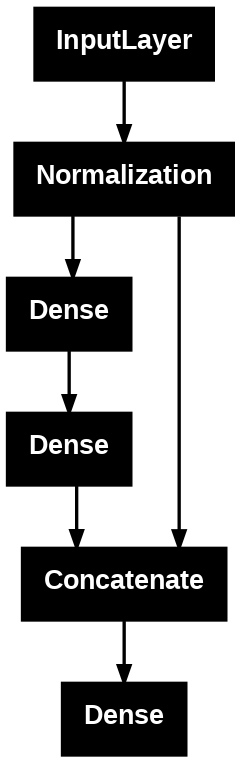

In [ ]:
keras.utils.plot_model(model, "functional_api.png", dpi=120)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 8)              │             17 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            270 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ normalization[0][0],   │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(mse_test, rmse_test)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.3641 - loss: 1.9651 - val_RootMeanSquaredError: 1.5132 - val_loss: 2.2896
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7119 - loss: 0.5081 - val_RootMeanSquaredError: 0.8630 - val_loss: 0.7447
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6453 - loss: 0.4168 - val_RootMeanSquaredError: 0.6548 - val_loss: 0.4288
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6249 - loss: 0.3908 - val_RootMeanSquaredError: 0.6237 - val_loss: 0.3891
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6119 - loss: 0.3746 - val_RootMeanSquaredError: 0.5959 - val_loss: 0.3551
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.5912 - loss: 0.3496
0.34805938601493835 0.5899655818939209


In [ ]:
# Multi input model
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

input_wide = tf.keras.layers.Input(shape=(5,))
input_deep = tf.keras.layers.Input(shape=(6,))
norm_wide_layer = tf.keras.layers.Normalization()
norm_deep_layer = tf.keras.layers.Normalization()
norm_wide = norm_wide_layer(input_wide)
norm_deep = norm_deep_layer(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

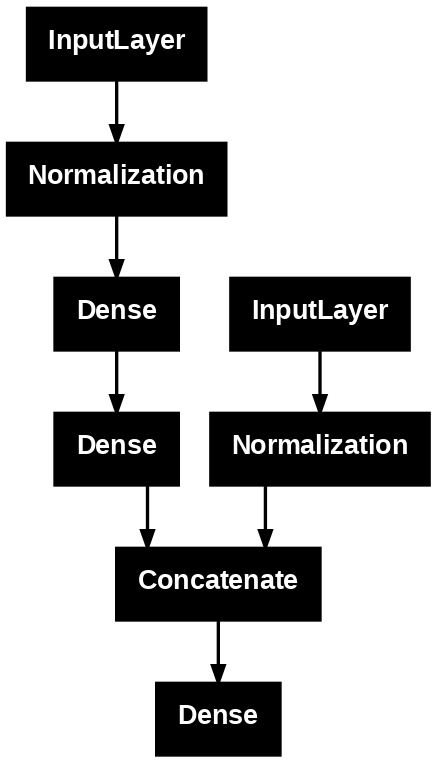

In [ ]:
keras.utils.plot_model(model, "functional_api.png", dpi=120)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_wide_layer.adapt(X_train_wide)
norm_deep_layer.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=5,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
print(mse_test)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 1.4676 - loss: 2.2534 - val_RootMeanSquaredError: 0.7424 - val_loss: 0.5511
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.7165 - loss: 0.5142 - val_RootMeanSquaredError: 0.6362 - val_loss: 0.4048
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6624 - loss: 0.4390 - val_RootMeanSquaredError: 0.8942 - val_loss: 0.7995
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6394 - loss: 0.4091 - val_RootMeanSquaredError: 0.8006 - val_loss: 0.6410
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6266 - loss: 0.3929 - val_RootMeanSquaredError: 1.1573 - val_loss: 1.3394
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.6148 - loss: 0.3781
[0.3732111155986786, 0.6109100580215454]


In [ ]:
# Multi output model

In [ ]:
input_wide = tf.keras.layers.Input(shape=(5,))
input_deep = tf.keras.layers.Input(shape=(6,))
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1, name="output")(concat)
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

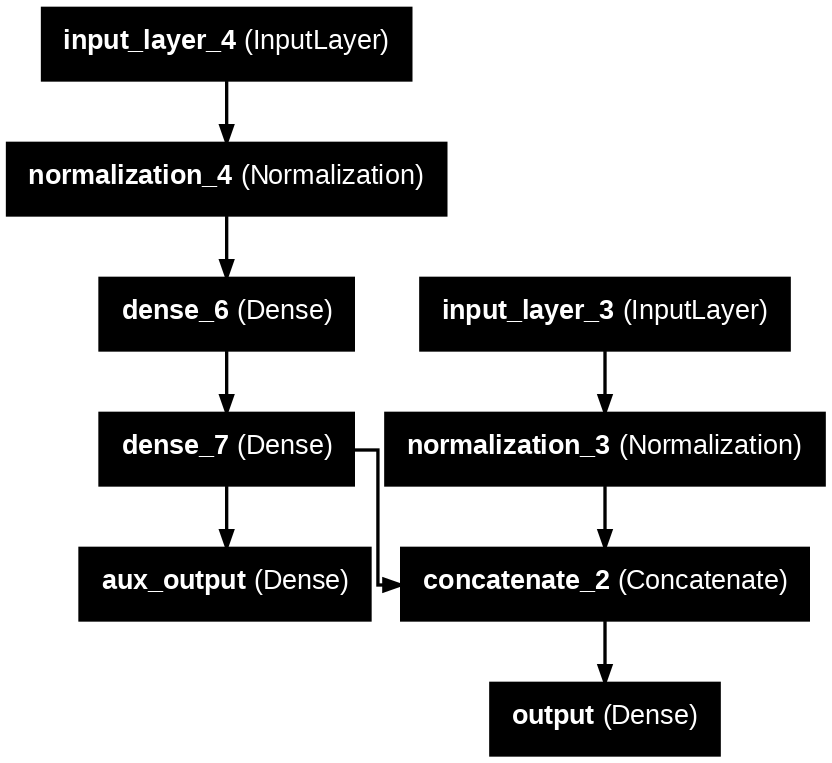

In [ ]:
keras.utils.plot_model(model, "functional_api.png", dpi=120, show_layer_names=True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=5,
          validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - aux_output_RootMeanSquaredError: 1.9095 - aux_output_loss: 3.7810 - loss: 2.6082 - output_RootMeanSquaredError: 1.5426 - output_loss: 2.4778 - val_aux_output_RootMeanSquaredError: 1.0097 - val_aux_output_loss: 1.0192 - val_loss: 0.9716 - val_output_RootMeanSquaredError: 0.9830 - val_output_loss: 0.9660
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - aux_output_RootMeanSquaredError: 0.8259 - aux_output_loss: 0.6829 - loss: 0.5744 - output_RootMeanSquaredError: 0.7494 - output_loss: 0.5623 - val_aux_output_RootMeanSquaredError: 0.7897 - val_aux_output_loss: 0.6235 - val_loss: 0.5249 - val_output_RootMeanSquaredError: 0.7169 - val_output_loss: 0.5138
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_RootMeanSquaredError: 0.7540 - aux_output_loss: 0.5688 - loss: 0.4728 - output_RootMeanSquaredError: 0.6796 - output_loss: 0.4621 - val_aux_output_RootMeanSquaredError: 0.7770 - val_aux_output_loss: 0.6037 - val_loss: 0.47

In [ ]:
mse_test = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
print(mse_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - aux_output_RootMeanSquaredError: 0.6914 - aux_output_loss: 0.4781 - loss: 0.3894 - output_RootMeanSquaredError: 0.6160 - output_loss: 0.3795
[0.38659554719924927, 0.37657636404037476, 0.48202675580978394, 0.6932529211044312, 0.613311231136322]
